In [15]:
import xarray as xr
import numpy as np
import os
import rioxarray
from odc.geo.geobox import GeoBox
from rioxarray.merge import merge_datasets
from odc.geo.xr import ODCExtensionDs, xr_zeros
from odc.geo.xr import xr_reproject as reproject
import matplotlib.pyplot as plt

## Scratch space

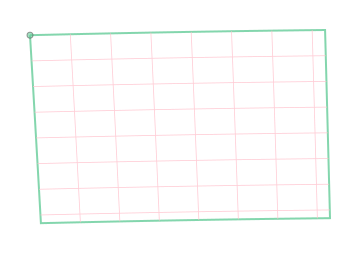

In [3]:
ds = rioxarray.open_rasterio('data/OPERA_L3_DSWx-S1/WTR/OPERA_L3_DSWx-S1_T19UCR_20250503T222928Z_20250504T114646Z_S1A_30_v1.0_B01_WTR.tif')\
    .to_dataset('band').rename({1: 'WTR'})
ds.odc.geobox

In [4]:
def _open_tiff(path, var_name):
    return rioxarray.open_rasterio(path).to_dataset('band').rename({1: var_name})

wtr_dir = 'data/OPERA_L3_DSWx-S1/WTR/'

tiles = [_open_tiff(os.path.join(wtr_dir, f), 'WTR') for f in os.listdir(wtr_dir)]

In [5]:
merged = merge_datasets(tiles)

In [6]:
merged

<xarray.Dataset> Size: 141MB
Dimensions:      (x: 10326, y: 13660)
Coordinates:
  * x            (x) float64 83kB 3e+05 3e+05 3.001e+05 ... 6.097e+05 6.098e+05
  * y            (y) float64 109kB 5.9e+06 5.9e+06 5.9e+06 ... 5.49e+06 5.49e+06
    spatial_ref  int64 8B 0
Data variables:
    WTR          (y, x) uint8 141MB 0 0 0 0 0 0 0 ... 255 255 255 255 255 255
Attributes: (12/71)
    CONTACT_INFORMATION:                                                   op...
    DSWX_PRODUCT_VERSION:                                                  1.0
    INPUT_DEM_SOURCE:                                                      Co...
    INPUT_GLAD_CLASSIFICATION_SOURCE:                                      GL...
    INPUT_HAND_SOURCE:                                                     AS...
    INPUT_REFERENCE_WATER_SOURCE:                                          JR...
    ...                                                                    ...
    SPATIAL_COVERAGE:                                                      99...
    AREA_OR_POINT:                                                         Area
    _FillValue:                                                            255
    scale_factor:                                                          1.0
    add_offset:                                                            0.0
    long_name:                                                             Wa...

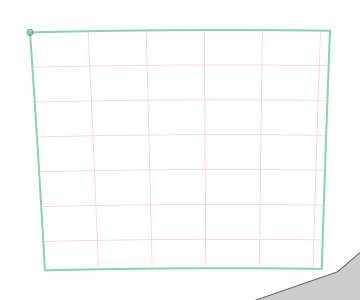

In [9]:
merged.odc.geobox

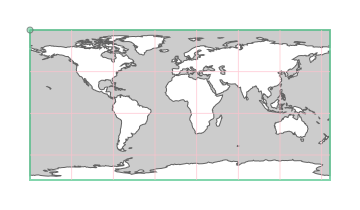

In [22]:
global_gbox = GeoBox.from_bbox(
    (-180.0, -90.0, 180.0, 90.0), "epsg:4326", resolution=0.01
)
global_gbox

In [12]:
reprojected = reproject(src=merged, how=global_gbox, resampling='nearest')
reprojected

<xarray.Dataset> Size: 648MB
Dimensions:      (latitude: 18000, longitude: 36000)
Coordinates:
  * latitude     (latitude) float64 144kB 90.0 89.98 89.98 ... -89.98 -90.0
  * longitude    (longitude) float64 288kB -180.0 -180.0 -180.0 ... 180.0 180.0
    spatial_ref  int32 4B 4326
Data variables:
    WTR          (latitude, longitude) uint8 648MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0

In [18]:
subset = reprojected.isel(latitude=slice(None, None, -1)).sel(longitude=slice(-72, -63), latitude=slice(48, 54.5))
subset

<xarray.Dataset> Size: 597kB
Dimensions:      (latitude: 650, longitude: 900)
Coordinates:
  * latitude     (latitude) float64 5kB 48.01 48.02 48.03 ... 54.48 54.49 54.5
  * longitude    (longitude) float64 7kB -72.0 -71.98 -71.98 ... -63.02 -63.0
    spatial_ref  int32 4B 4326
Data variables:
    WTR          (latitude, longitude) uint8 585kB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0

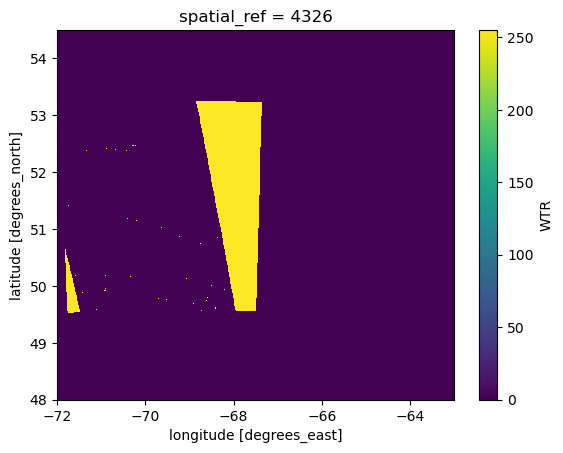

In [19]:
subset.WTR.plot()
plt.show()

In [20]:
subset = reprojected.isel(latitude=slice(None, None, -1)).sel(longitude=slice(-70, -68), latitude=slice(50, 52))
subset

<xarray.Dataset> Size: 43kB
Dimensions:      (latitude: 200, longitude: 200)
Coordinates:
  * latitude     (latitude) float64 2kB 50.01 50.02 50.03 ... 51.98 51.99 52.0
  * longitude    (longitude) float64 2kB -70.0 -69.98 -69.98 ... -68.02 -68.0
    spatial_ref  int32 4B 4326
Data variables:
    WTR          (latitude, longitude) uint8 40kB 0 0 0 1 0 ... 255 255 255 255

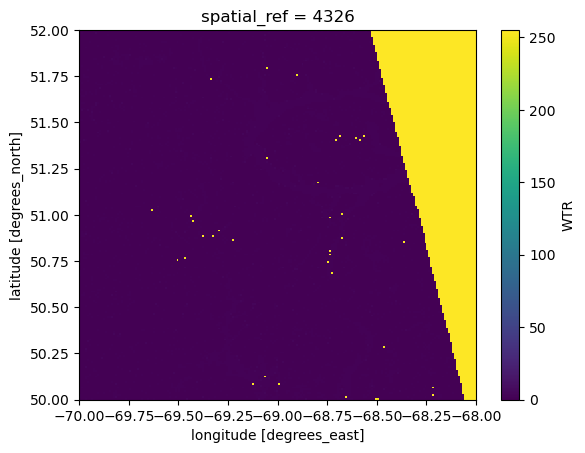

In [21]:
subset.WTR.plot()
plt.show()